# Diagnosing Chronic Kidney Disease (CKD) with 100% Accuracy

# Description

Chronic kidney disease (CKD), also known as chronic renal disease. Chronic kidney disease involves
conditions that damage your kidneys and decrease their ability to keep you healthy. You may develop complications like high
blood pressure, anemia (low blood count), weak bones, poor nutritional health and nerve damage. 

Attribute Information:
Matrix column entries (attributes): 
-->The age of person-age,
-->blood pressure level-bp,
-->Sugar level-su,
-->Specific gravity-sg,
-->Red blood cells-rgb,
-->pus cell-pc,
-->pus cell clumps-pcc,
-->Blood gulcose random-bgr,
-->Blood Urea-Bu,
-->Bacteria-Ba,
-->Serum Creatinine-sc,
-->Sodium-sod,
-->Potassium-pot,
-->Hemoglobin-hemo,
-->Packed cell volume-pcv,
-->White Blood cell count-wbcc,
-->Red Blood cell count-rbcc,
-->Hypertension-htn,
-->Diabetes Mellitus-dm,
-->Coronary Artery Disease-cad,
-->Appetite-appet,
-->Pedal Edema-pe,
-->Anemia-ane,
-->classes-Target

## Summary

In this project, I use Logistic Regression and K-Nearest Neighbors (KNN) to diagnose CKD. Both were able to classify patients with 100% accuracy.

KNN required class balancing, scaling, and model tuning to perform with 100% accuracy, while Logistic Regression was 100% accurate without tuning (note: still had to stratify the train test split). 

Logistic Regression is deemed a better model for this case, because in addition to being 100% accurate, it also allows us to quantify the impact of unit increases in specific variables on likelihood of having CKD.

# data collection

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
import scipy.stats as stats
import seaborn as sns

%matplotlib inline

In [2]:
#reading the input file and storing in data
df = pd.read_csv('C:/Users/Public/Desktop (2)/chronic_kidney_disease.csv')
data = df

# data interpetation

In [3]:
#printing the data i.e, the input dataset
data

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38.0,6000.0,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31.0,7500.0,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35.0,7300.0,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,140.0,...,47.0,6700.0,4.9,no,no,no,good,no,no,notckd
396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.0,...,54.0,7800.0,6.2,no,no,no,good,no,no,notckd
397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,100.0,...,49.0,6600.0,5.4,no,no,no,good,no,no,notckd
398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,114.0,...,51.0,7200.0,5.9,no,no,no,good,no,no,notckd


In [4]:
#printing the data attributes with datatype
data.info()
type(data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     391 non-null    float64
 1   bp      388 non-null    float64
 2   sg      353 non-null    float64
 3   al      354 non-null    float64
 4   su      351 non-null    float64
 5   rbc     248 non-null    object 
 6   pc      335 non-null    object 
 7   pcc     396 non-null    object 
 8   ba      396 non-null    object 
 9   bgr     356 non-null    float64
 10  bu      381 non-null    float64
 11  sc      383 non-null    float64
 12  sod     313 non-null    float64
 13  pot     312 non-null    float64
 14  hemo    348 non-null    float64
 15  pcv     329 non-null    float64
 16  wbcc    294 non-null    float64
 17  rbcc    269 non-null    float64
 18  htn     398 non-null    object 
 19  dm      398 non-null    object 
 20  cad     398 non-null    object 
 21  appet   399 non-null    object 
 22  pe

pandas.core.frame.DataFrame

In [5]:
#displaying the first 5 values
data.head()


,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38.0,6000.0,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31.0,7500.0,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35.0,7300.0,4.6,no,no,no,good,no,no,ckd


In [6]:
#displaying the last 5 values
data.tail()


,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,140.0,...,47.0,6700.0,4.9,no,no,no,good,no,no,notckd
396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.0,...,54.0,7800.0,6.2,no,no,no,good,no,no,notckd
397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,100.0,...,49.0,6600.0,5.4,no,no,no,good,no,no,notckd
398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,114.0,...,51.0,7200.0,5.9,no,no,no,good,no,no,notckd
399,58.0,80.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,131.0,...,53.0,6800.0,6.1,no,no,no,good,no,no,notckd


In [7]:
data.describe()

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,rbcc
count,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000,329.000000,294.000000,269.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437,38.884498,8406.122449,4.707435
std,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587,8.990105,2944.474190,1.025323
min,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000,9.000000,2200.000000,2.100000
25%,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000,32.000000,6500.000000,3.900000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000,40.000000,8000.000000,4.800000
75%,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000,45.000000,9800.000000,5.400000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000,54.000000,26400.000000,8.000000


# Data Mapping

In [8]:
data['class'] = data['class'].map({'ckd':1,'notckd':0})
data['htn'] = data['htn'].map({'yes':1,'no':0})
data['dm'] = data['dm'].map({'yes':1,'no':0})
data['cad'] = data['cad'].map({'yes':1,'no':0})
data['appet'] = data['appet'].map({'good':1,'poor':0})
data['ane'] = data['ane'].map({'yes':1,'no':0})
data['pe'] = data['pe'].map({'yes':1,'no':0})
data['ba'] = data['ba'].map({'present':1,'notpresent':0})
data['pcc'] = data['pcc'].map({'present':1,'notpresent':0})
data['pc'] = data['pc'].map({'abnormal':1,'normal':0})
data['rbc'] = data['rbc'].map({'abnormal':1,'normal':0})

In [9]:
#checking the count of class-TARGET
data['class'].value_counts()

1    250
0    150
Name: class, dtype: int64

Factors that may increase your risk of chronic kidney disease include:

- Diabetes - su(blood sugar), dm (diabetes mellitus)
- High blood pressure - BP
- Heart and blood vessel (cardiovascular) disease
- Smoking
- Obesity
- Being African-American, Native American or Asian-American
- Family history of kidney disease
- Abnormal kidney structure
- Older age - age

# EXPLANATORY DATA ANALYSIS

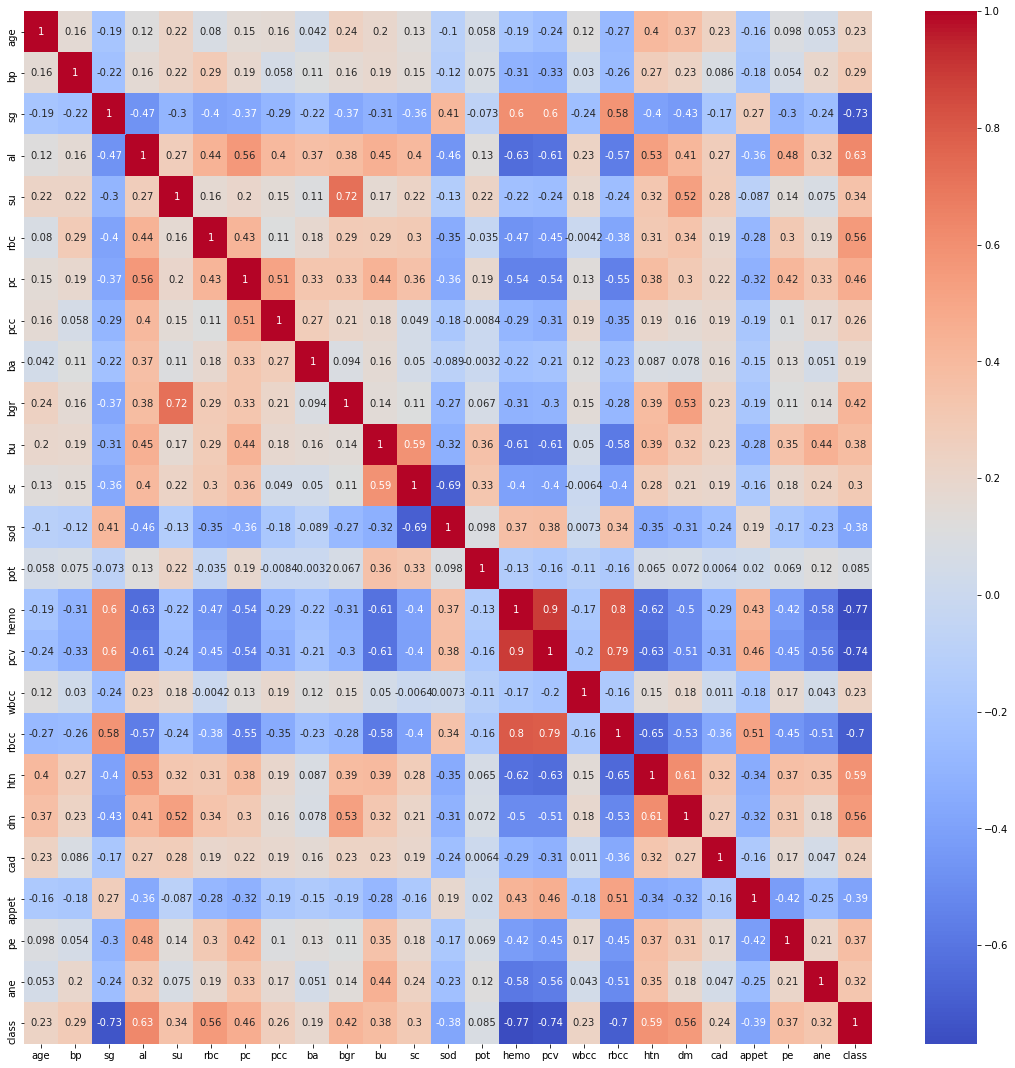

In [10]:
#Figuring the plot with help of heatmap
plt.figure(figsize = (19,19))
sns.heatmap(data.corr(), annot = True, cmap = 'coolwarm') # looking for strong correlations with "class" row 

# Explortary data analysis-EDA

In [37]:
#Checking the size of input datset
data.shape

(158, 25)

In [12]:
#displaying the columns in dataset
data.columns

Index(['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'pcv', 'wbcc', 'rbcc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'class'],
      dtype='object')

In [13]:
#checking if NULL values are present
data.isnull().sum()

age        9
bp        12
sg        47
al        46
su        49
rbc      152
pc        65
pcc        4
ba         4
bgr       44
bu        19
sc        17
sod       87
pot       88
hemo      52
pcv       71
wbcc     106
rbcc     131
htn        2
dm         2
cad        2
appet      1
pe         1
ane        1
class      0
dtype: int64

In [14]:
#Checking the size of input datset
data.shape[0], data.dropna().shape[0]

(400, 158)

We would only have 158 rows remaining if we drop the na columns.  One downside is that we reduce the overall power of our model when we feed in less data, and another is that we dont know if the fact that those values are null is related in some way to an additional variable.  If the latter is the case, throwing out that data could potentially skew our data.

I am going to drop in this case and see how the model performs.


In [15]:
data.dropna(inplace=True)

In [16]:
#Checking the shape of the data
data.shape

(158, 25)

# Modeling

## Logistic Regression

In [17]:
from sklearn.linear_model import LogisticRegression

In [18]:
logreg = LogisticRegression()

In [19]:
# splitting the concept and target 
X = data.iloc[:,:-1]
y = data['class']

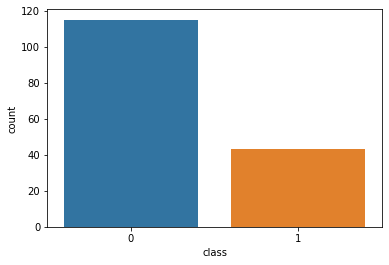

In [20]:
#DATA ANALYSIS METHOD-VISUALIZATION
#To know the count  of values in the target we plot a count graph#0=notckd#1=ckd
sns.countplot(data['class'])

In [21]:
#split the input data for testing and training
X_train, X_test, y_train, y_test = train_test_split(X,y, stratify = y, shuffle = True)

In [22]:
#Fitting the data into x and y train
logreg.fit(X_train,y_train)

C:\Users\Chirag\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [23]:
#Prediction of the X test and train
test_pred = logreg.predict(X_test)
train_pred = logreg.predict(X_train)

In [24]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [25]:
#Printing the train and test accuracy
print('Train Accuracy: ', accuracy_score(y_train, train_pred))
print('Test Accuracy: ', accuracy_score(y_test, test_pred))

Train Accuracy:  1.0
Test Accuracy:  1.0


### The cell below shows the coefficients for each variable.
(example on reading the coefficients from a Logistic Regression: a one unit increase in age makes an individual about e^0.14 time as likely to have ckd, while a one unit increase in blood pressure makes an individual about e^-0.07 times as likely to have ckd.

In [26]:
#printing dataframe of columns
pd.DataFrame(logreg.coef_, columns=X.columns)

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,hemo,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane
0,0.240097,-0.036072,0.006264,0.453113,0.008433,0.026202,0.134408,0.001075,0.012848,0.176157,...,-0.231402,-0.79679,0.000934,-0.13989,0.125522,0.124116,0.001037,-0.007571,0.003844,0.00135


In [27]:
#Prediting test prediction of y test
tn, fp, fn, tp = confusion_matrix(y_test, test_pred).ravel()

print(f'True Neg: {tn}')
print(f'False Pos: {fp}')
print(f'False Neg: {fn}')
print(f'True Pos: {tp}')

True Neg: 29
False Pos: 0
False Neg: 0
True Pos: 11


## K-Nearest Neighbors Classifier

I am going to balance the classes here before using KNN. Logistic regression was able to make accurate predictions even when trained on unbalanced classes, but KNN is more sensitive to unbalanced classes

In [38]:
#defining the counts in class
df["class"].value_counts()

0    115
1     43
Name: class, dtype: int64

In [39]:
#resting index value
balanced_df = pd.concat([df[df["class"] == 0], df[df["class"] == 1].sample(n = 115, replace = True)], axis = 0)
balanced_df.reset_index(drop=True, inplace=True)

In [41]:
#printing class count after resting
balanced_df["class"].value_counts()

1    115
0    115
Name: class, dtype: int64

In [31]:
X = balanced_df.drop("class", axis=1)
y = balanced_df["class"]

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 42)

In [42]:
#Fitting the data and tranforming it
ss = StandardScaler()
ss.fit(X_train)
X_train = ss.transform(X_train)
X_test = ss.transform(X_test)

In [43]:
from sklearn.neighbors import KNeighborsClassifier

In [44]:
#Predicting the accuracy 
knn = KNeighborsClassifier()
params = {
    "n_neighbors":[3,5,7,9],
    "weights":["uniform","distance"],
    "algorithm":["ball_tree","kd_tree","brute"],
    "leaf_size":[25,30,35],
    "p":[1,2]
}
gs = GridSearchCV(knn, param_grid=params)
model = gs.fit(X_train,y_train)
preds = model.predict(X_test)
accuracy_score(y_test, preds)

0.9655172413793104

In [55]:
#confusion_matrix prediction
tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()

print(f'True Neg: {tn}')
print(f'False Pos: {fp}')
print(f'False Neg: {fn}')
print(f'True Pos: {tp}')


True Neg: 26
False Pos: 0
False Neg: 2
True Pos: 30
